# Time Series Analysis and Forecasting with ARIMA Model

**Objective:** To apply ARIMA modeling techniques to forecast the number of app updates in the Google Play Store for the next 12 months based on historical data.

**Submitted by:** Neil Ivan S. Orencia

In [ ]:
# Importing necessary libraries for the tasks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Loading the dataset called "googleplaystore.csv"
df = pd.read_csv('googleplaystore.csv')

# Displaying the first few rows of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Displaying the last few rows of the dataset
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Data Cleaning and Preparation

Clean the dataset by handling missing values, removing duplicates, and converting fields like 'Reviews', 'Size', 'Installs', and 'Price' to a numerical format for analysis.

In [ ]:
# Getting the sum of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Replacing 'Varies with device' values in the 'Size' column with NaN (missing values)
df['Size'] = df['Size'].replace('Varies with device', np.nan)

In [ ]:
# Removing rows with missing values in specific columns ('Type', 'Content Rating', 'Current Ver', 'Android Ver', 'Size')
df.dropna(subset= ['Type', 'Content Rating', 'Current Ver', 'Android Ver', 'Size'], inplace=True)

In [ ]:
# Filling the missing values (NaN) in the 'Rating' column with the rounded mean rating value
df['Rating'].fillna(round(df['Rating'].mean(), 1), inplace=True)

# Displaying the last few rows of the dataset
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,4.2,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Removing duplicate rows from the DataFrame and modifying it in place
df.drop_duplicates(inplace=True)

In [ ]:
# Getting the sum of missing values (NaN) in each column of the DataFrame once again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Converting 'Rating' column to integer type
df['Rating'] = df['Rating'].astype(int)

# Converting 'Reviews' column to integer type
df['Reviews'] = df['Reviews'].astype(int)

# Converting 'Size' column to float type, handling 'M' and 'k' suffixes
df['Size'] = df['Size'].apply(lambda x: float(x[:-1]) * 1e6 if isinstance(x, str) and x[-1] == 'M' else (float(x[:-1]) if isinstance(x, str) and x[-1] == 'k' else float(x)))

# Converting 'Installs' column to integer type, removing '+' and ',' characters
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace('+', '').replace(',', '')))

# Converting 'Price' column to float type, removing '$' character
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')))

In [ ]:
# Displaying the first few rows of the DataFrame
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Exploratory Data Analysis (EDA)

Perform EDA to uncover trends in the dataset. This may include analyzing the distribution of app ratings, understanding the proportion of free vs. paid apps, and identifying which categories have the most apps.

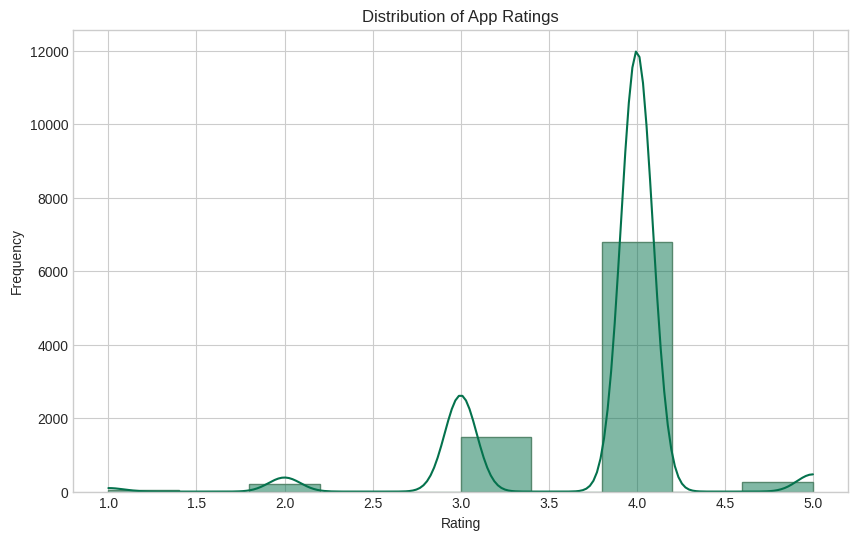

In [ ]:
# Distribution of App Ratings with custom color (hex code)
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='#04724D', edgecolor='#56876D')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

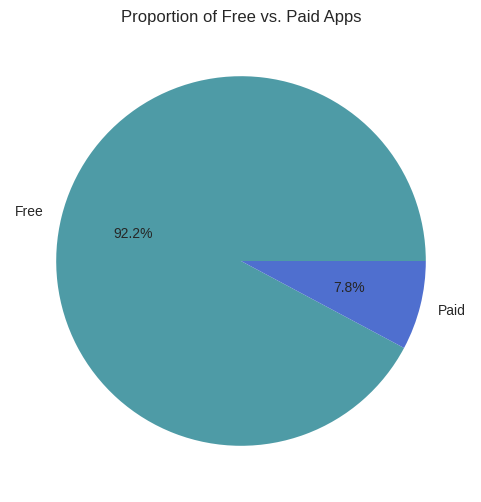

In [ ]:
# Proportion of Free vs. Paid Apps
free_apps = df[df['Type'] == 'Free'].shape[0]
paid_apps = df[df['Type'] == 'Paid'].shape[0]
total_apps = df.shape[0]

plt.figure(figsize=(6, 6))
plt.pie([free_apps, paid_apps], labels=['Free', 'Paid'], autopct='%1.1f%%', colors=['#4E9BA6', '#4F6FCF'])
plt.title('Proportion of Free vs. Paid Apps')
plt.show()

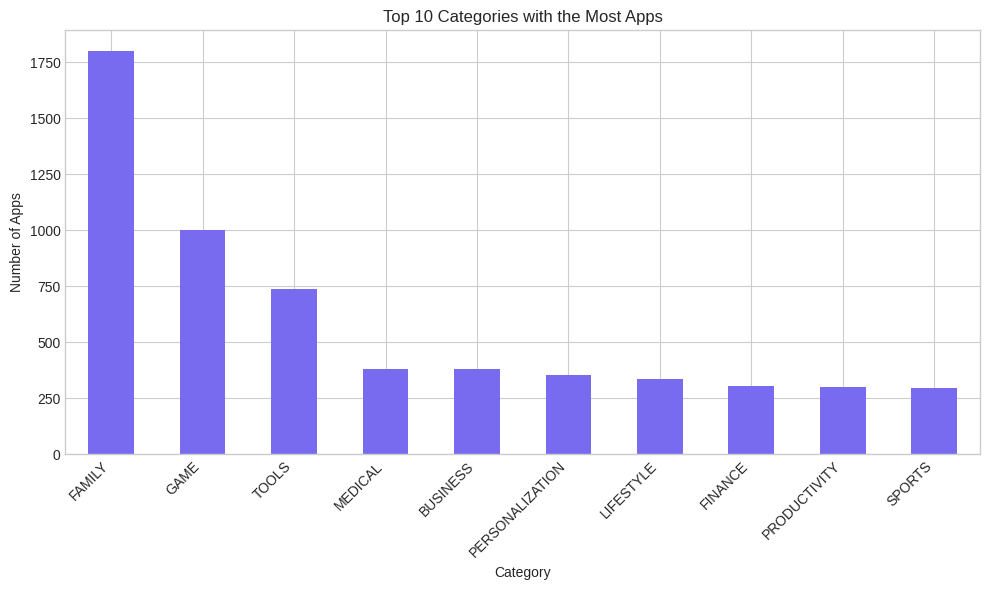

In [ ]:
# Categories with the Most Apps
top_categories = df['Category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='#796BEF')
plt.title('Top 10 Categories with the Most Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Category Analysis

Analyze the app categories to find out which category has the highest average rating, the most reviews, and the most apps. Additionally, investigate the relationship between category and app size or price.

In [ ]:
# Highest Average Rating by Category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
highest_avg_rating_category = avg_rating_by_category.idxmax()
print(f"The category with the highest average rating is: {highest_avg_rating_category} ({avg_rating_by_category[highest_avg_rating_category]:.2f})")

# Most Reviews by Category
most_reviews_category = df.groupby('Category')['Reviews'].sum().idxmax()
print(f"The category with the most reviews is: {most_reviews_category} ({df.groupby('Category')['Reviews'].sum()[most_reviews_category]:,})")

# Most Apps by Category
most_apps_category = df['Category'].value_counts().idxmax()
print(f"The category with the most apps is: {most_apps_category} ({df['Category'].value_counts()[most_apps_category]})")

The category with the highest average rating is: EVENTS (4.05)
The category with the most reviews is: GAME (1,206,724,780)
The category with the most apps is: FAMILY (1803)


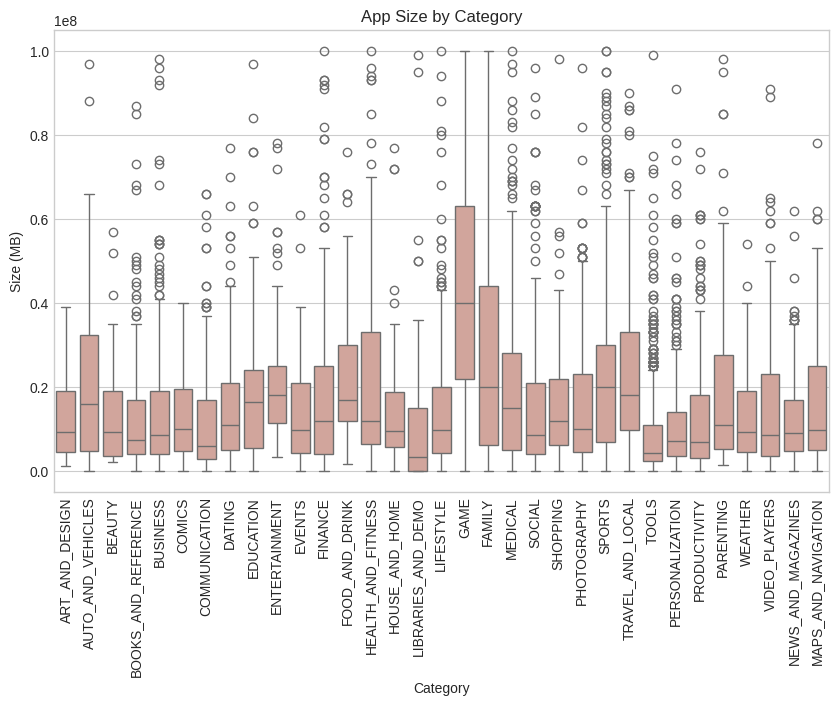

In [ ]:
# Relationship between category and app size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Size', data=df, color='#DA9F93')
plt.xticks(rotation=90)
plt.title('App Size by Category')
plt.xlabel('Category')
plt.ylabel('Size (MB)')
plt.show()

**App Size by Category**

The x-axis lists the various app categories, while the y-axis represents the app size in megabytes (MB). Each category is represented by a box plot, which provides information about the distribution of app sizes within that category.

Looking at the box plots, we can observe significant variations in app sizes across different categories. Some categories, such as `ART_AND_DESIGN`, `AUTO_AND_VEHICLES`, and `BEAUTY`, tend to have smaller app sizes, with most apps falling under 100 MB. These categories likely consist of apps that are less resource-intensive or require fewer features.

On the other hand, categories like `LIBRARIES_AND_DEMO`, `MEDICAL`, and `NEWS_AND_MAGAZINES` appear to have larger app sizes, with the median (middle line of the box) and upper quartile (top of the box) extending well above 100 MB. These categories may include apps that require more storage space due to multimedia content, advanced functionality, or large databases.

There are also some categories with a wide range of app sizes, indicated by the length of the whiskers (vertical lines extending from the boxes). For example, `PRODUCTIVITY` and `TRAVEL_AND_LOCAL` have apps ranging from very small sizes to several hundred megabytes which suggests a diverse range of apps within these categories.

In general, the box plot shows the variability in app sizes across different categories, likely due to the varying nature and requirements of the apps within each category. Categories with more resource-intensive or feature-rich apps tend to have larger app sizes, while those with simpler or more lightweight apps have smaller sizes.

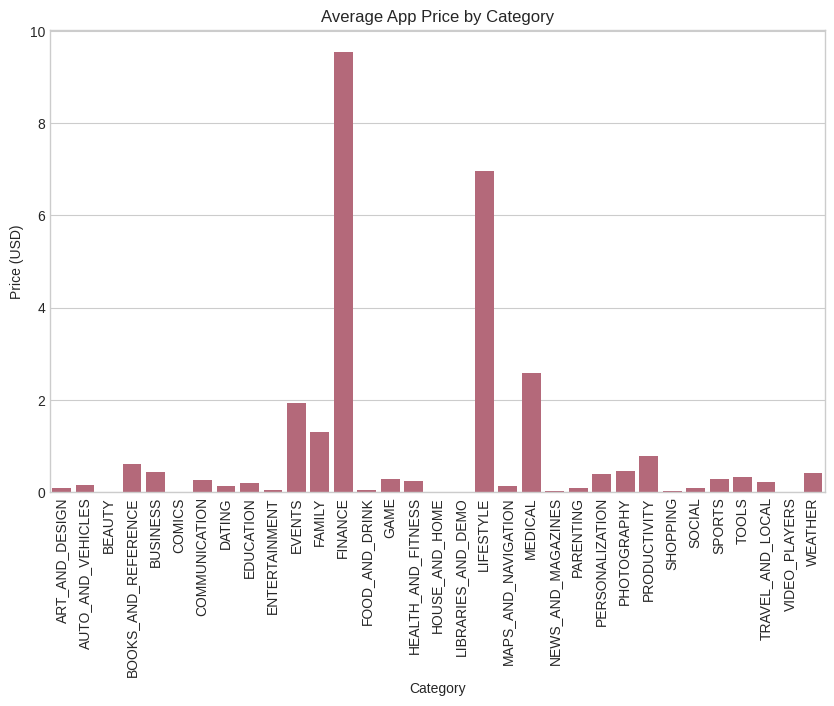

In [ ]:
# Relationship between category and price
category_avg_price = df.groupby('Category')['Price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Price', data=category_avg_price, color='#C05D73')
plt.xticks(rotation=90)
plt.title('Average App Price by Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.show()

**Average App Price by Category**

The x-axis represents different app categories, while the y-axis displays the average price in USD. The chart provides a visual comparison of the average pricing across various app categories in an app store or marketplace.

## Rating Prediction Model

Build a model to predict the rating of an app based on its features  (e.g.,  Reviews,  Size, Installs, Type, Price, Content Rating). Split the data into training and testing sets, select relevant features, and evaluate the model's performance.

In [ ]:
# Selecting relevant features
X = df[['Reviews', 'Size', 'Installs', 'Price']]
y = df['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model performance
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 0.30
Root Mean Squared Error: 0.55
R-squared: 0.00


Analysis of the results of the evaluation metrics:

1. <u>**Mean Squared Error (MSE): 0.30**</u> - The MSE measures the average squared differences between predicted and actual ratings. An MSE of 0.30 indicates that, on average, the squared difference between predicted and actual ratings is 0.30 units. Lower MSE values indicate better model performance, but the interpretation depends on the scale of the target variable.
2. <u>**Root Mean Squared Error (RMSE): 0.55**</u> - The RMSE is the square root of MSE and represents the typical deviation of the predictions from the actual ratings. An RMSE of 0.55 indicates that, on average, the model's predictions are off by approximately 0.55 units from the actual ratings. This value is relatively high which suggests that the model's predictions have a considerable amount of error.
3. <u>**R-squared (R2): 0.00**</u> - The R-squared value measures the proportion of variance in the ratings that is explained by the model. An R2 of 0.00 means that the model does not explain any of the variability in the ratings. Essentially, the model's predictions are no better than predicting the mean rating for all apps.

## Trend Analysis

Analyze the trends over time in the app market. Investigate how the characteristics of the top apps (e.g., rating, reviews, installs) have evolved. Consider the impact of Android versions on app ratings or installs.

In [ ]:
# Converting 'Last Updated' to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Extracting year and month from 'Last Updated'
df['Year'] = df['Last Updated'].dt.year
df['Month'] = df['Last Updated'].dt.month

# Identifying the top apps based on criteria (e.g., rating, reviews, installs)
top_apps_by_rating = df.nlargest(10, 'Rating')
top_apps_by_reviews = df.nlargest(10, 'Reviews')
top_apps_by_installs = df.nlargest(10, 'Installs')

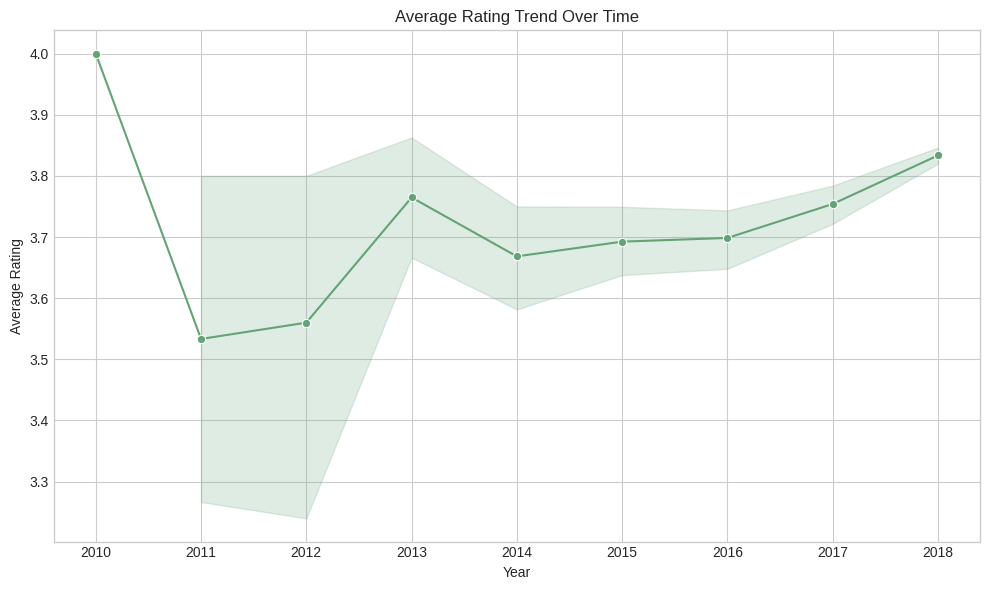

In [ ]:
# Trend Analysis: Ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating', estimator='mean', marker='o', color='#63A375')
plt.title('Average Rating Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Trend Analysis: Ratings over time**

The graph shows the trend of average app rating over the years from 2010 to 2018. The ratings started relatively high in 2010 but then declined sharply until around 2012. From 2012 to 2015, the average rating remained relatively stable around 3.6-3.7. After 2015, the average rating started increasing steadily, reaching nearly 3.9 by 2018. This trend suggests that app quality or user expectations may have fluctuated initially, but the app market has matured, leading to higher average ratings in recent years.

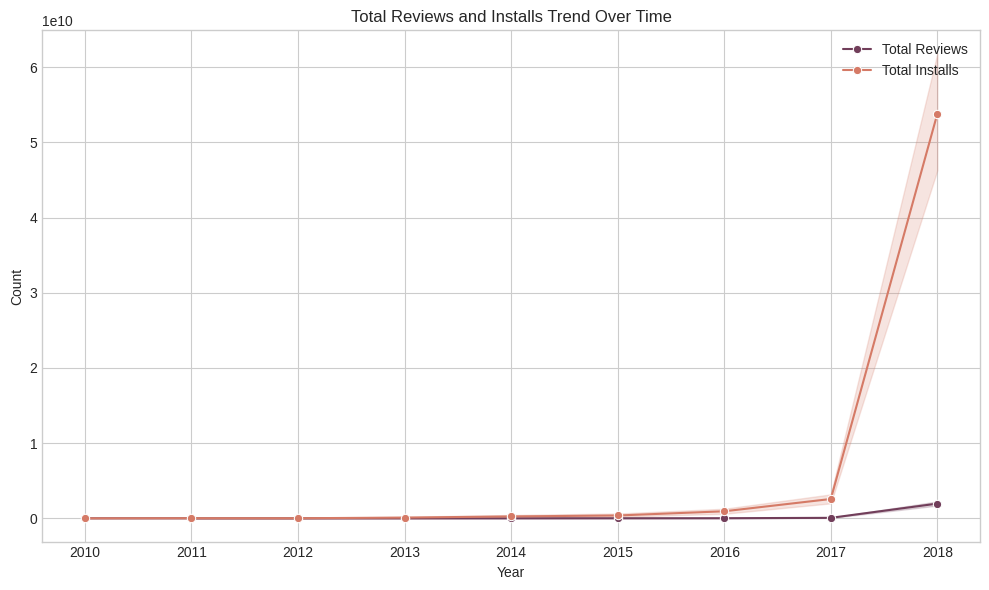

In [ ]:
# Trend Analysis: Reviews and Installs over time for top apps
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Reviews', estimator='sum', label='Total Reviews', marker='o', color='#713E5A')
sns.lineplot(data=df, x='Year', y='Installs', estimator='sum', label='Total Installs', marker='o', color='#D57A66')
plt.title('Total Reviews and Installs Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

**Trend Analysis: Reviews and Installs over time for top apps**

The graph displays the trends for total reviews (blue line) and total installs (red line) over the same time period. The total reviews remained relatively flat and low from 2010 to 2016, indicating a slower growth in reviews during that period. However, the total installs started showing a significant upward trend from around 2014 onwards which suggests a rapid increase in app installations in recent years. By 2018, the total installs had grown substantially, far exceeding the growth in total reviews. This disparity could be due to factors like increased smartphone adoption, improved app discoverability, or changes in user behavior (installing more apps but not necessarily reviewing them).

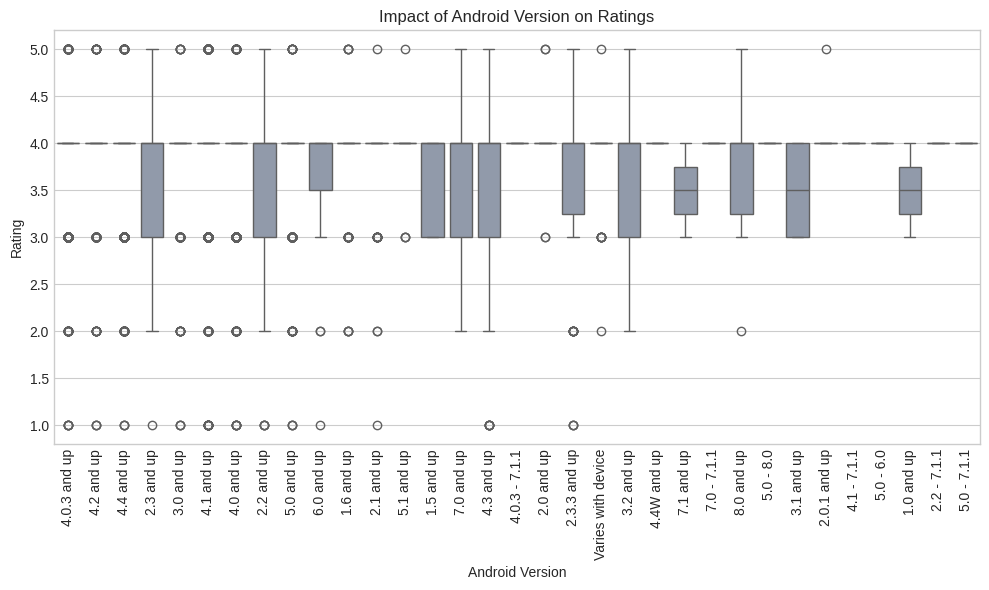

In [ ]:
# Android Version Impact on Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Android Ver', y='Rating', color='#8D99AE')
plt.title('Impact of Android Version on Ratings')
plt.xlabel('Android Version')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Android Version Impact on Ratings**

This graph shows the average rating for apps across different Android versions. The ratings seem to be relatively consistent across most Android versions, with the average rating hovering around 4.0 for many versions. There are a few outliers with higher or lower average ratings, but these could be due to smaller sample sizes or other factors specific to those Android versions. Overall, the graph does not indicate a strong correlation between Android version and app ratings, suggesting that ratings are likely influenced more by other factors like app quality, user experience, or category.

## Impact of Reviews on Ratings

Investigate the correlation between the number of reviews an app receives and its rating. Determine if more reviews are indicative of higher ratings.

In [ ]:
# Calculating the correlation coefficient
print(f"Correlation Coefficient between Reviews and Rating: {df['Reviews'].corr(df['Rating']):.2f}")

Correlation Coefficient between Reviews and Rating: 0.05


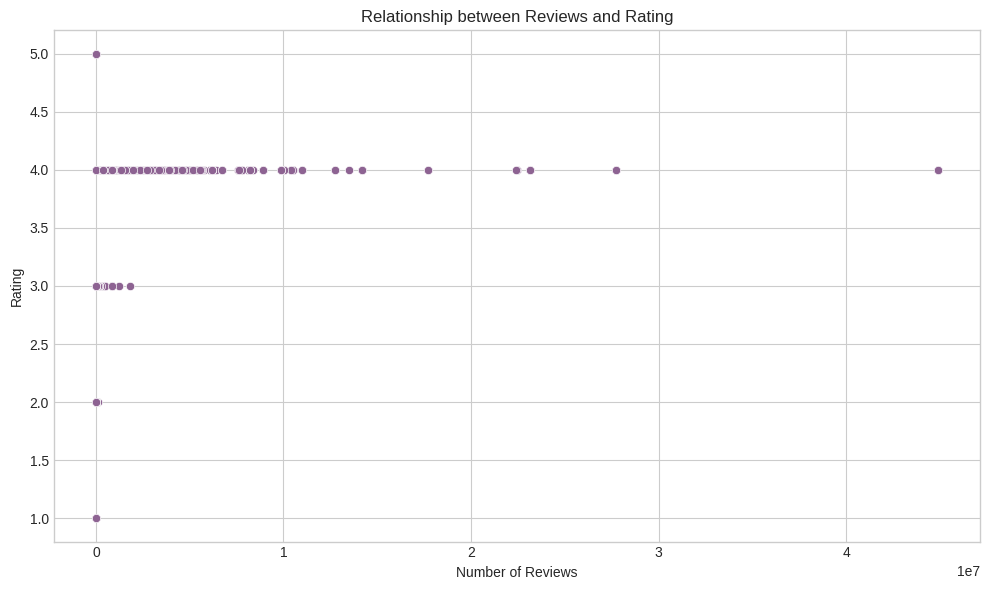

In [ ]:
# Visualizing the relationship between Reviews and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Reviews', y='Rating', color='#8D6392')
plt.title('Relationship between Reviews and Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

The graph plots the number of reviews on the x-axis against the app rating on the y-axis. We can observe a positive correlation between the two variables which means that apps with more reviews tend to have higher ratings. This relationship seems to hold true for most of the data points, although there is some variation and outliers present.

The data points are scattered across the plot, but there appears to be a higher concentration of points in the lower range of reviews (0-2 reviews) with ratings spanning the entire range from around 1.0 to 4.5. As the number of reviews increases beyond 2, the ratings tend to cluster more tightly around the higher end, generally between 4.0 and 4.5.

There are a few outliers in the data, such as apps with a relatively high number of reviews but a lower rating (around 3.5). These outliers could be due to various factors, such as highly polarized user opinions, changes in app quality over time, or other factors not captured in this specific dataset.

Overall, the scatter plot suggests that apps with more reviews tend to have higher ratings, which could be because apps with more users and reviews have had more opportunities to refine and improve their quality based on user feedback.